# Learning Rate Calculation/Visualization

In [2]:
import numpy as np
import math,copy
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
house_data=pd.read_csv('houses.txt')
house_data

,Size,Number_of_Bedrooms,Number_of_floors,Age_of_Home,Price
0,952.0,2.0,1.0,65.0,271.5
1,1244.0,3.0,1.0,64.0,300.0
2,1947.0,3.0,2.0,17.0,509.8
3,1725.0,3.0,2.0,42.0,394.0
4,1959.0,3.0,2.0,15.0,540.0
...,...,...,...,...,...
95,1224.0,2.0,2.0,12.0,329.0
96,1432.0,2.0,1.0,43.0,388.0
97,1660.0,3.0,2.0,19.0,390.0
98,1212.0,3.0,1.0,20.0,356.0


In [4]:

x_features = house_data[['Size', 'Number_of_Bedrooms', 'Number_of_floors', 'Age_of_Home']]
x_train=x_features
y_train=house_data.Price


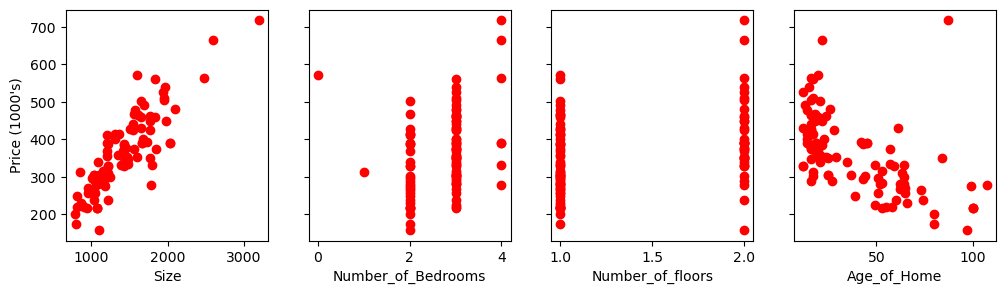

In [5]:
fig, ax = plt.subplots(1, 4, figsize=(12,3),sharey=True )

l=len(x_train.columns)

for i in range(l):
    feature=x_train.columns[i]
    ax[i].scatter(x_train[feature], y_train,c='r')
    ax[i].set_xlabel(feature)

ax[0].set_ylabel("Price (1000's)")
plt.show()


# Prediction

In [6]:
def compute_cost(x, y, w, b): 
  
    m = x.shape[0]
    cost = 0.0
    

    
    for i in range(m):
        xii = x.iloc[i]
        f_wb_i = np.dot(xii, w) + b           #(n,)(n,) = scalar (see np.dot)
        cost = cost + (f_wb_i - y[i])**2       #scalar
    cost = cost / (2 * m)                      #scalar    
    return cost

In [7]:
w_init = np.array([0,0,0,0])

def compute_gradient(x, y, w, b):
    m, n = x.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):
        xi = x.iloc[i]
        err = np.dot(xi, w) + b - y[i]
        for j in range(n):
            dj_dw[j] += err * xi.iloc[j]
        dj_db += err


    dj_dw /= m
    dj_db /= m

    return dj_db, dj_dw


def gradient_descent(x, y, w_in, b_in, gradient_function, alpha, num_iters,cost_function):
    w = copy.deepcopy(w_in)  
    b = b_in
    j_history=[]
    
    for i in range(num_iters):
        dj_db,dj_dw = gradient_function(x, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        
        if i<100000:      # prevent resource exhaustion 
            j_history.append( cost_function(x, y, w, b))
        
    return  j_history,w, b

initial_w = np.zeros_like(w_init)
initial_b = 0.
iterations = 10
alpha = 1e-7

hist,w_final, b_final = gradient_descent(x_train, y_train, initial_w, initial_b, compute_gradient, alpha, iterations,compute_cost)
print(f"Final Value of w : {w_final},Final Value of b: {b_final:0.2f}")




Final Value of w : [2.31049889e-01 4.17806180e-04 2.12479177e-04 4.86542198e-03],Final Value of b: 0.00


# When learning rate is nither large nor less


Text(0.5, 1.0, 'Learning Curve')

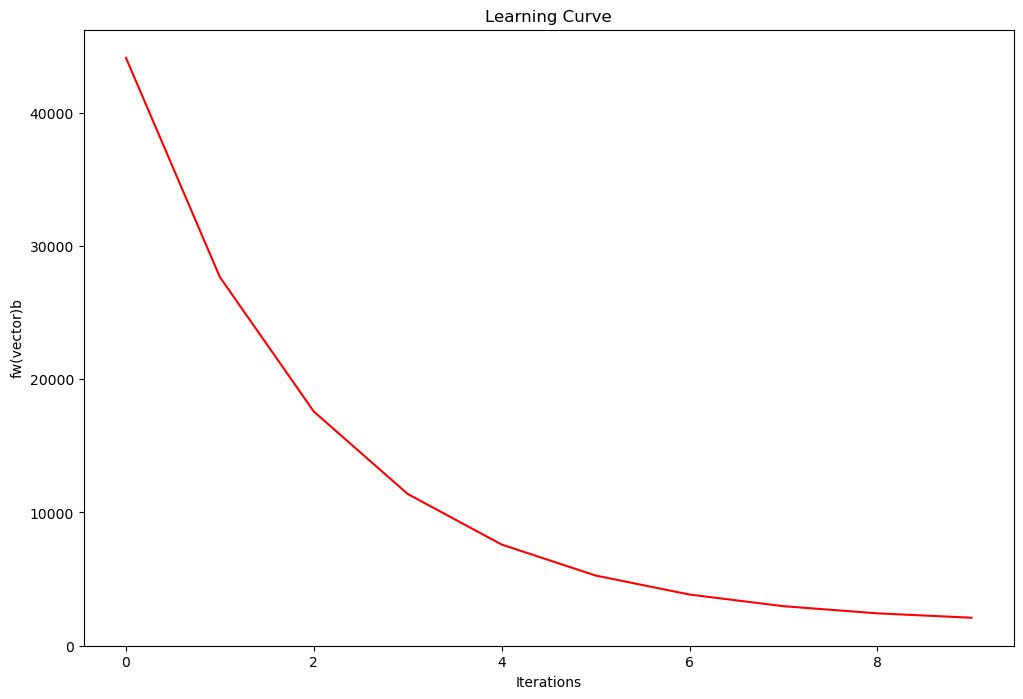

In [8]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iterations), hist,'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('fw(vector)b')
ax.set_title('Learning Curve')


# When learning rate(alpha) is quite large 

In [9]:
hist,w_final, b_final = gradient_descent(x_train, y_train, initial_w, initial_b, compute_gradient,8e-1 , iterations,compute_cost)


Text(0.5, 1.0, 'Learning Curve')

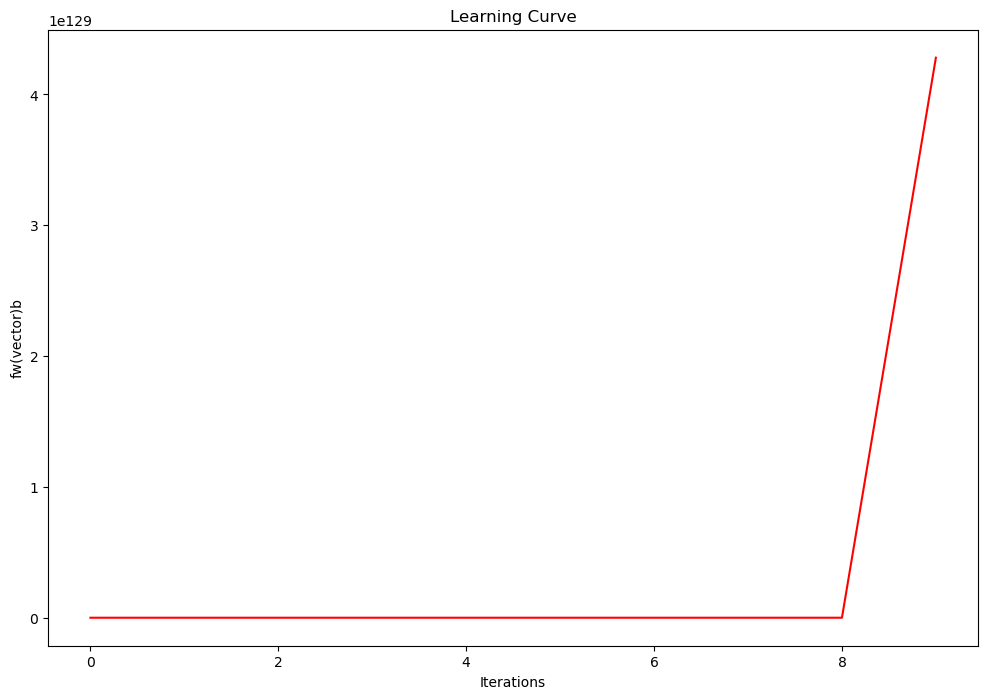

In [10]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iterations), hist,'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('fw(vector)b')
ax.set_title('Learning Curve')
